# La ecuación de Bellman: El valor de cada estado

La **Ecuación de Bellman** es una fórmula recursiva utilizada en la toma de decisiones y en el aprendizaje por refuerzo. Muestra cómo *el valor de estar en un determinado estado* depende de las **recompensas recibidas** y del **valor de los estados futuros**. 

En términos sencillos, la Ecuación de Bellman descompone un problema complejo en pasos más pequeños, lo que facilita su resolución. La ecuación ayuda a encontrar la mejor forma de tomar decisiones cuando los resultados dependen de una serie de acciones.   

En concreto, la Ecuación de Bellman permite a los agentes calcular el valor de diferentes estados y acciones, lo que les guía en la elección del mejor camino para maximizar las recompensas. 

Así, en el aprendizaje por refuerzo, la Ecuación de Bellman se utiliza para evaluar y mejorar las políticas, garantizando que los agentes tomen mejores decisiones a medida que adquieren experiencia.

Los componentes de la Ecuación de Bellman son:

![Bellman_1](https://user-images.githubusercontent.com/44867923/140994838-db45e51e-d92b-4b37-9df6-99e1a7e2def3.jpg)
![Bellman_2](https://user-images.githubusercontent.com/44867923/140994794-51d739af-eb70-4e6a-9036-b925f23ab7fd.jpg)

Si tomamos un ejemplo con un mundo cuadriculado sencillo, podríamos suponer lo siguiente:

Disponemos de un agente que intenta alcanzar un objetivo en una cuadrícula mientras evita obstáculos. El agente se mueve hacia arriba, abajo, izquierda o derecha y obtiene recompensas por cada movimiento. Si alcanza el objetivo, obtiene una recompensa mayor. Utilizando la Ecuación de Bellman, podemos calcular el valor de cada estado de la red evaluando las recompensas inmediatas y los valores de los estados futuros.

## Ejemplo con "Frozen-Lake".

### Importamos librerías

In [1]:
import gymnasium as gym
import numpy as np
import seaborn as sns

### Creando el entorno: "Frozen-Lake" determinístico 

In [2]:
env = gym.make("FrozenLake-v1", is_slippery=True)

### Creando la tabla V: Un valor V para cada estado.

In [3]:
V = np.zeros(env.observation_space.n)
V

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Agente: jugando en el entorno y actualizando la tabla de valores V

In [8]:
gamma = 0.9
for ep in range(1000):
    obs, _ = env.reset()
    done = False

    while not done:

        action = env.action_space.sample()
        next_obs, reward, done, _ , _ = env.step(action)

        previous_obs_value = V[int(obs)]
        actual_obs_value = reward + gamma*V[next_obs]

        if actual_obs_value > previous_obs_value:
             V[obs] = actual_obs_value

        obs = next_obs

### Graficando la tabla de valores de cada estado

<Axes: >

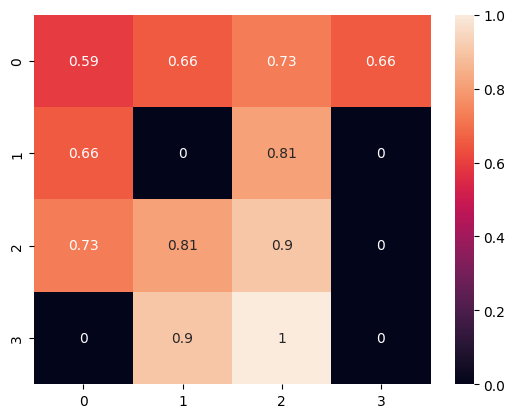

In [9]:
sns.heatmap(
    data=V.reshape(4,4),
    annot=True
)